### River seasonal cycle

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import datetime as dt
from scipy.interpolate import interp1d
import pickle
import calendar
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

##### Functions

In [9]:
def read_discharge(file):
    
    file_data = pd.read_csv(file)
    dates     = pd.to_datetime(file_data['date'])
    discharge = file_data['discharge']
    
    return dates, discharge

In [10]:
def find_nearest_date(shorter_array, longer_array):
    idx = []
    for date in shorter_array:
        diff = np.abs(longer_array - date)
        idx.append(diff.idxmin())
    
    return idx

In [40]:
def plot_seasonal_cycle(ax, Mn_river, dates_river, river_discharge, dates_discharge, discharge=False):

    for mth in range(1,13):
        # Plot the dissolved Mn seasonal cycle
        dates = dates_river[dates_river.dt.month == mth]
        Mn   = Mn_river[dates_river.dt.month == mth]

        date_array = [pd.to_datetime('2005-'+str(date.month)+'-'+str(date.day)) for date in dates]
      
        ax.plot(date_array, Mn, '.w', markersize=25, markeredgecolor='k', zorder=3, label='_Hidden')

        # Also plot the discharge seasonal cycle
        if discharge:
            dates_Q = dates_discharge[dates_discharge.dt.month == mth]
            Q       = river_discharge[dates_discharge.dt.month == mth]
            
            if mth==2:
                dates_Q[dates_Q.dt.day > 28] = dt.datetime(2005,2,28)
                
            try:
                date_array_Q = [pd.to_datetime('2005-'+str(date.month)+'-'+str(date.day)) for date in dates_Q]
                ax.plot(date_array_Q, Q, '.k', markersize=1, zorder=1, label='_Hidden')   
            except:
                pass
        
    return

In [41]:
def plot_Qseasonal_cycle(ax, river_discharge, dates_discharge, color='k', size=2):

    for mth in range(1,13):
        dates_Q = dates_discharge[dates_discharge.dt.month == mth]
        Q       = river_discharge[dates_discharge.dt.month == mth]
            
        if mth==2:
            dates_Q[dates_Q.dt.day > 28] = dt.datetime(2005,2,28)
                
        try:
            date_array_Q = [pd.to_datetime('2005-'+str(date.month)+'-'+str(date.day)) for date in dates_Q]
            ax.plot(date_array_Q, Q, '.', c=color, markersize=size, markeredgecolor='k', \
                    zorder=2, label='_Hidden')   
        except:
            pass
        
    return

##### Load files

Discharge and trace metal data files from the Arctic Great Rivers Observatory

In [31]:
discharge_file_Mack   = '/ocean/brogalla/GEOTRACES/data/rivers/Mackenzie_Arctic_Red_River_1972_2020.csv'
discharge_file_Kolyma = '/ocean/brogalla/GEOTRACES/data/rivers/Kolyma_Kolymskoe_1978_2020.csv'
discharge_file_Lena   = '/ocean/brogalla/GEOTRACES/data/rivers/Lena_Kyusyur_1936_2020.csv'
discharge_file_Ob     = '/ocean/brogalla/GEOTRACES/data/rivers/Ob_Salekhard_1936_2020.csv'
discharge_file_Yeni   = '/ocean/brogalla/GEOTRACES/data/rivers/Yenisei_Igarka_1936_2020.csv'
discharge_file_Yukon  = '/ocean/brogalla/GEOTRACES/data/rivers/Yukon_Pilot_Station_1975_2020.csv'

tracer_file    = '/ocean/brogalla/GEOTRACES/data/rivers/AGRO_river_tracers.csv'

In [32]:
Mack_dates  , Mack_discharge   = read_discharge(discharge_file_Mack)
Kolyma_dates, Kolyma_discharge = read_discharge(discharge_file_Kolyma)
Lena_dates  , Lena_discharge   = read_discharge(discharge_file_Lena)
Ob_dates    , Ob_discharge     = read_discharge(discharge_file_Ob)
Yeni_dates  , Yeni_discharge   = read_discharge(discharge_file_Yeni)
Yukon_dates , Yukon_discharge  = read_discharge(discharge_file_Yukon)

In [33]:
tracers        = pd.read_csv(tracer_file)

Kolyma_dates_tracers   = pd.to_datetime(tracers['date'][0:8])
Lena_dates_tracers     = pd.to_datetime(tracers['date'][8:23])
Mack_dates_tracers     = pd.to_datetime(tracers['date'][23:37])
Ob_dates_tracers       = pd.to_datetime(tracers['date'][37:52])
Yenisey_dates_tracers  = pd.to_datetime(tracers['date'][52:65])
Yukon_dates_tracers    = pd.to_datetime(tracers['date'][65:80])

Mn_Kolyma      = tracers['Mn (nM)'][0:8]
Mn_Lena        = tracers['Mn (nM)'][8:23]
Mn_Mack        = tracers['Mn (nM)'][23:37]
Mn_Ob          = tracers['Mn (nM)'][37:52]
Mn_Yenisey     = tracers['Mn (nM)'][52:65]
Mn_Yukon       = tracers['Mn (nM)'][65:80]

TSS_Kolyma     = tracers['TSS (mg/L)'][0:8]
TSS_Lena       = tracers['TSS (mg/L)'][8:23]
TSS_Mack       = tracers['TSS (mg/L)'][23:37]
TSS_Ob         = tracers['TSS (mg/L)'][37:52]
TSS_Yenisey    = tracers['TSS (mg/L)'][52:65]
TSS_Yukon      = tracers['TSS (mg/L)'][65:80]

In [34]:
# Smaller Arctic rivers data:
coppermine_dates, coppermine_discharge = pickle.load(open('/ocean/brogalla/GEOTRACES/data/rivers/coppermine_data.pickle','rb'))
burnside_dates, burnside_discharge     = pickle.load(open('/ocean/brogalla/GEOTRACES/data/rivers/burnside_data.pickle','rb'))
ellice_dates, ellice_discharge         = pickle.load(open('/ocean/brogalla/GEOTRACES/data/rivers/ellice_data.pickle','rb'))

##### Calculations

In [35]:
# Normalized Mn concentrations:
Mn_Mack_norm    = Mn_Mack/np.amax(Mn_Mack)
Mn_Kolyma_norm  = Mn_Kolyma/np.amax(Mn_Kolyma)
Mn_Lena_norm    = Mn_Lena/np.amax(Mn_Lena)
Mn_Ob_norm      = Mn_Ob/np.amax(Mn_Ob)
Mn_Yenisey_norm = Mn_Yenisey/np.amax(Mn_Yenisey)
Mn_Yukon_norm   = Mn_Yukon/np.amax(Mn_Yukon)

Identify discharge nearest to trace metal measurement date:

In [36]:
idx_Mack    = find_nearest_date(Mack_dates_tracers   , Mack_dates)
idx_Kolyma  = find_nearest_date(Kolyma_dates_tracers , Kolyma_dates)
idx_Lena    = find_nearest_date(Lena_dates_tracers   , Lena_dates)
idx_Ob      = find_nearest_date(Ob_dates_tracers     , Ob_dates)
idx_Yenisey = find_nearest_date(Yenisey_dates_tracers, Yeni_dates)
idx_Yukon   = find_nearest_date(Yukon_dates_tracers  , Yukon_dates)

\begin{equation}
Mn \cdot Q = \frac{mol}{L} \cdot \frac{m^3}{s} \cdot \frac{1000\ L}{m^3}= \frac{1000\ mol}{s}
\end{equation}

In [37]:
# calculate Mn contribution using nearest-date discharge
QMn_Mack    = np.array(Mn_Mack)   *np.array(Mack_discharge[idx_Mack])    *1e3/(3600*24)
QMn_Kolyma  = np.array(Mn_Kolyma) *np.array(Kolyma_discharge[idx_Kolyma])*1e3/(3600*24)
QMn_Lena    = np.array(Mn_Lena)   *np.array(Lena_discharge[idx_Lena])    *1e3/(3600*24)
QMn_Ob      = np.array(Mn_Ob)     *np.array(Ob_discharge[idx_Ob])        *1e3/(3600*24)
QMn_Yenisey = np.array(Mn_Yenisey)*np.array(Yeni_discharge[idx_Yenisey]) *1e3/(3600*24)
QMn_Yukon   = np.array(Mn_Yukon)  *np.array(Yukon_discharge[idx_Yukon])  *1e3/(3600*24)

##### Figures

The river discharge seasonal cycles plotted below are based on the Arctic Great Rivers, lower down, I re-do it with smaller drainage basin Canadian Arctic Archipelago rivers

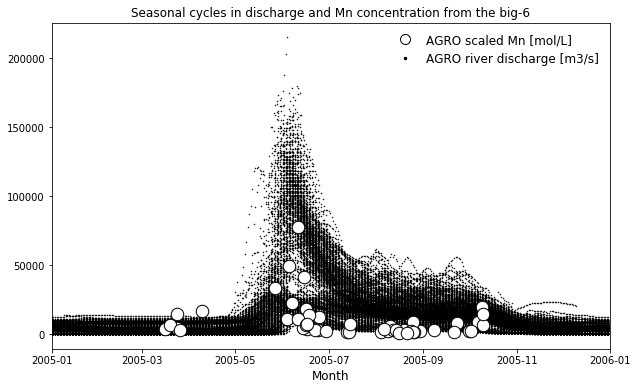

In [50]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

plot_seasonal_cycle(ax, Mn_Mack*1e2   , Mack_dates_tracers   , Mack_discharge  , Mack_dates  , discharge=True)
plot_seasonal_cycle(ax, Mn_Kolyma*1e2 , Kolyma_dates_tracers , Kolyma_discharge, Kolyma_dates, discharge=True)
plot_seasonal_cycle(ax, Mn_Lena*1e2   , Lena_dates_tracers   , Lena_discharge  , Lena_dates  , discharge=True)
# plot_seasonal_cycle(ax, Mn_Ob*1e2     , Ob_dates_tracers     , Ob_discharge    , Ob_dates    , discharge=True) ### ignore b/c some weird points
plot_seasonal_cycle(ax, Mn_Yenisey*1e2, Yenisey_dates_tracers, Yeni_discharge  , Yeni_dates  , discharge=True)
# plot_seasonal_cycle(ax, Mn_Yukon*1e2  , Yukon_dates_tracers  , Yukon_discharge , Yukon_dates , discharge=True) ### ignore b/c some weird points
    
ax.plot(dt.datetime(2004,1,1),0, '.', markersize=20, c='w', markeredgecolor='k', label='AGRO scaled Mn [mol/L]')
ax.plot(dt.datetime(2004,1,1),0, '.', markersize=5, c='k', label='AGRO river discharge [m3/s]')

ax.set_xlabel("Month", fontsize=12)
ax.set_xlim(dt.datetime(2005,1,1), dt.datetime(2006,1,1))
ax.set_title('Seasonal cycles in discharge and Mn concentration from the big-6')
ax.legend(frameon=False, fontsize=12)

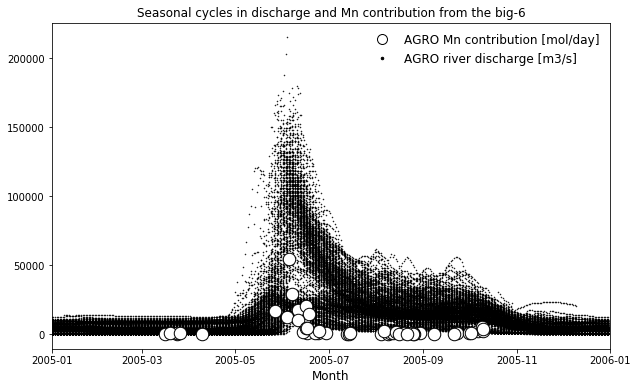

In [49]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

plot_seasonal_cycle(ax, QMn_Mack*1e-1   , Mack_dates_tracers, Mack_discharge, Mack_dates, discharge=True)
plot_seasonal_cycle(ax, QMn_Kolyma*1e-1 , Kolyma_dates_tracers, Kolyma_discharge, Kolyma_dates, discharge=True)
plot_seasonal_cycle(ax, QMn_Lena*1e-1   , Lena_dates_tracers, Lena_discharge, Lena_dates, discharge=True)
# plot_seasonal_cycle(ax, Mn_Ob     , Ob_dates_tracers) ### ignore b/c some weird points
plot_seasonal_cycle(ax, QMn_Yenisey*1e-1, Yenisey_dates_tracers, Yeni_discharge, Yeni_dates, discharge=True)
# plot_seasonal_cycle(ax, Mn_Yukon  , Yukon_dates_tracers) ### ignore b/c some weird points

ax.plot(0,0, '.', markersize=20, c='w', markeredgecolor='k', label='AGRO Mn contribution [mol/day]')
ax.plot(0,0, '.', markersize=5, c='k', label='AGRO river discharge [m3/s]')
    
ax.set_xlabel("Month", fontsize=12)
ax.set_xlim(dt.datetime(2005,1,1), dt.datetime(2006,1,1))
ax.set_title('Seasonal cycles in discharge and Mn contribution from the big-6')
ax.legend(frameon=False, fontsize=12)

Small Arctic rivers data:
https://www.r-arcticnet.sr.unh.edu/v4.0/Tiles/arctic4.html

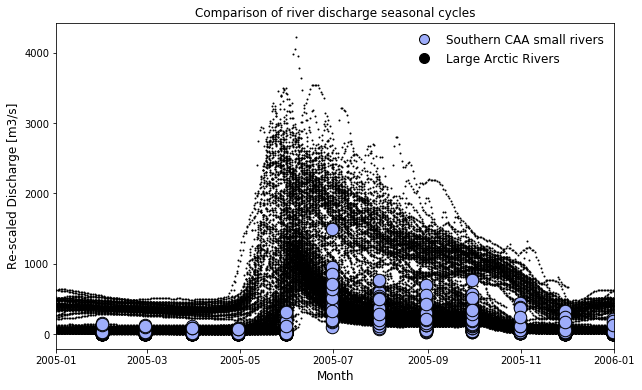

In [51]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

color_CAA = '#9eadfb'

plot_Qseasonal_cycle(ax, Mack_discharge*1e-1, Mack_dates)
plot_Qseasonal_cycle(ax, Kolyma_discharge*1e-1, Kolyma_dates)
plot_Qseasonal_cycle(ax, Lena_discharge*1e-2, Lena_dates)
plot_Qseasonal_cycle(ax, Yeni_discharge*1e-2, Yeni_dates)
plot_Qseasonal_cycle(ax, ellice_discharge, ellice_dates, color=color_CAA, size=25)
plot_Qseasonal_cycle(ax, burnside_discharge, burnside_dates, color=color_CAA, size=25)
plot_Qseasonal_cycle(ax, coppermine_discharge, coppermine_dates, color=color_CAA, size=25)

ax.plot(0,0, '.', markersize=20, c=color_CAA, markeredgecolor='k', label='Southern CAA small rivers')
ax.plot(0,0, '.', markersize=20, c='k', label='Large Arctic Rivers')
    
ax.set_ylabel('Re-scaled Discharge [m3/s]', fontsize=12)
ax.set_xlabel("Month", fontsize=12)
ax.set_xlim(dt.datetime(2005,1,1), dt.datetime(2006,1,1))
ax.set_title("Comparison of river discharge seasonal cycles")
ax.legend(frameon=False, fontsize=12)